In [72]:
import pandas as pd
import numpy as np

In [73]:
car_df = pd.read_csv("car_fuel_efficiency.csv")
car_df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [74]:
car_df_new = car_df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

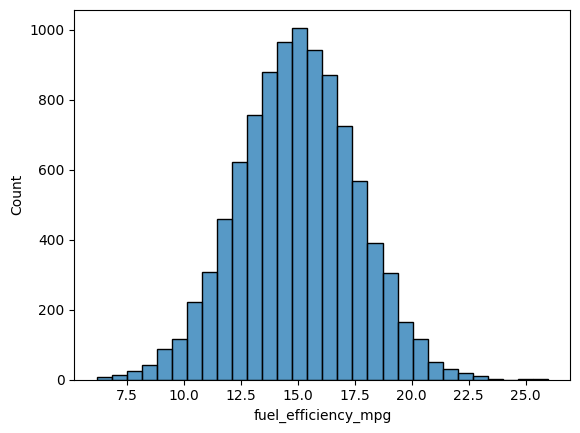

In [76]:
sns.histplot(car_df_new['fuel_efficiency_mpg'], bins=30)

In [77]:
car_df_new.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [78]:
car_df_new.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [79]:
np.random.seed(42)
np.random.shuffle(car_df_new.values)

In [80]:
n = len(car_df_new)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

In [81]:
df_train = car_df_new[:n_train]
df_val = car_df_new[n_train:n_train + n_val]
df_test = car_df_new[n_train + n_val:]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [82]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [15]:
def train_linear_regression(X, y):
    X = np.array(X)
    y = np.array(y)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [16]:
x_train = df_train[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].fillna(0).values

In [17]:
x_train

array([[ 170.        ,  159.        , 3413.43375861, 2003.        ],
       [ 130.        ,   97.        , 3149.66493422, 2007.        ],
       [ 170.        ,   78.        , 3079.03899737, 2018.        ],
       ...,
       [ 160.        ,  156.        , 2990.33420301, 2020.        ],
       [ 240.        ,  105.        , 3495.1008121 , 2014.        ],
       [ 210.        ,  171.        , 3434.25218007, 2011.        ]],
      shape=(5822, 4))

In [18]:
w0, w = train_linear_regression(x_train, y_train)

In [19]:
y_pred = w0 + x_train.dot(w)

<Axes: ylabel='Count'>

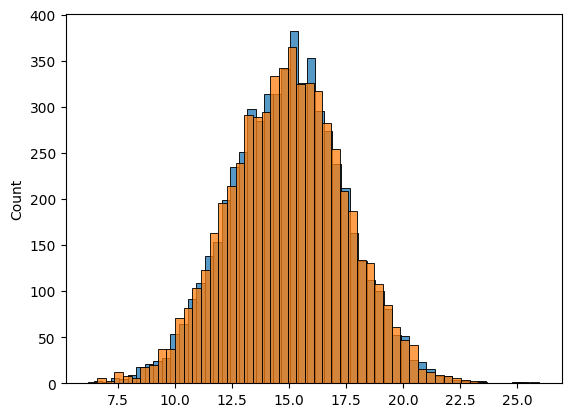

In [20]:
sns.histplot(y_pred)
sns.histplot(y_train)

In [46]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean() 
    return round(np.sqrt(mse), 2)

In [22]:
rmse(y_train, y_pred)

np.float64(0.5221796235613309)

In [23]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
X = df_train[cols]
x_train_n = X.fillna(X.mean()).to_numpy()

w0, w = train_linear_regression(x_train_n, y_train)

y_pred = w0 + x_train_n.dot(w)

In [24]:
rmse(y_train, y_pred)

np.float64(0.4656175647721311)

In [ ]:

def prepare_X(df, cols, type):
    df_num = df[cols]
    if type == 'mean':
        df_num = df_num.fillna(df.mean())
    elif type == 'zero':
        df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [39]:
x_train_n = prepare_X(df_train)
w0, w = train_linear_regression(x_train_n, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5174983602208271)

In [40]:
def train_linear_regression_reg(X, y, r=0.01):
    X = np.array(X)
    y = np.array(y)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [50]:
for r in [0, 0.01, 1, 10, 100]:
    x_train_n = prepare_X(df_train)
    w0, w = train_linear_regression_reg(x_train_n, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 28.220914650426316 0.52
0.01 24.413666863089546 0.52
1 1.7006003746862581 0.53
10 0.17981848915028692 0.53
100 0.01809211900699789 0.53


In [95]:
# Root mean squared error
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    rmse = np.sqrt(mse)
    return rmse

In [96]:
def prepare_X(df, feature, fillnan_with):
    df_copy = df.copy()
    if fillnan_with == 'mean':
        df_copy[feature].fillna(value = df_copy[feature].mean(), inplace=True)
    elif fillnan_with == 'zero':
        df_copy[feature].fillna(value = 0, inplace=True)
        
    return df_copy.values

In [ ]:


def split_data(df, target_column, train_size = 0.6, 
               val_size = 0.2, seed = 42):
    
    
    n = len(df)
    n_train = int(train_size*n)
    n_val = int(val_size*n)
    
    # Shuffle data
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    # Split data
    X_train = df_shuffled.iloc[:n_train].copy()
    X_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    X_test = df_shuffled.iloc[n_train + n_val:].copy()


    Y_train = X_train[target_column].values
    Y_val = X_val[target_column].values
    Y_test = X_test[target_column].values

    del X_train[target_column]
    del X_val[target_column]
    del X_test[target_column]
    
    col = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

    # Fill missing values with zeros
    X_train = prepare_X(X_train[col], 'horsepower', 'zero')
    X_val = prepare_X(X_val[col], 'horsepower', 'zero')
    X_test = prepare_X(X_test[col], 'horsepower', 'zero')

    X = {'train':X_train, 'val':X_val, 'test':X_test}
    Y = {'train': Y_train,'val':Y_val,'test': Y_test}

    return X,Y

In [97]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

errors = []
for seed in seeds:
    X,Y = split_data(df = car_df, target_column= 'fuel_efficiency_mpg', seed = seed)
    w0, w = train_linear_regression(X['train'], Y['train'])


    Y_pred = w0 + X['val'].dot(w)
    error = rmse(Y['val'], Y_pred)

    print('%10s' %seed, round( error, 3) )
    errors.append( error )   

print('Std =', round(np.std(errors), 3))

         0 0.521
         1 0.522
         2 0.523
         3 0.516
         4 0.511
         5 0.529
         6 0.532
         7 0.51
         8 0.515
         9 0.513
Std = 0.007


/var/folders/8w/r7x8f5pd51z1c9_tbj82jbrw0000gn/T/ipykernel_775/1090097034.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[feature].fillna(value = 0, inplace=True)
/var/folders/8w/r7x8f5pd51z1c9_tbj82jbrw0000gn/T/ipykernel_775/1090097034.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [85]:
X,Y = split_data(df = car_df, target_column= 'fuel_efficiency_mpg', seed = 9)

/var/folders/8w/r7x8f5pd51z1c9_tbj82jbrw0000gn/T/ipykernel_775/1090097034.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[feature].fillna(value = 0, inplace=True)
/var/folders/8w/r7x8f5pd51z1c9_tbj82jbrw0000gn/T/ipykernel_775/1090097034.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [86]:
# Combine train and validation
X_train = np.concatenate([ X['train'], X['val']])
Y_train = np.concatenate([ Y['train'], Y['val']])

In [89]:

def train_linear_regression_reg(X, y, r=0.001):
    X = np.array(X)
    y = np.array(y)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [94]:
# Train model on train and validation and use in test set
w0, w = train_linear_regression_reg(X_train, Y_train, r = 0.001)


Y_pred = w0 + X['test'].dot(w)

score = rmse(Y['test'], Y_pred)
print('RMSE on test set = ', round( rmse(Y['test'], Y_pred), 4))

RMSE on test set =  0.5155
